In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
# Normalize the dataset (values between 0 and 1)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [ ]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
# Split off a validation set from the training data
X_val = X_train[:10000]
y_val = y_train[:10000]
X_train = X_train[10000:]
y_train = y_train[10000:]

In [ ]:
# Create the model
model = models.Sequential()

In [ ]:

# First hidden layer with L1 regularization (Ridge)
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l1(1e-5), input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Second hidden layer with L2 regularization (Lasso)
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(1e-4)))
model.add(layers.MaxPooling2D((2, 2)))

In [ ]:
# Dropout layer to prevent overfitting (50% dropout)
model.add(layers.Dropout(0.5))

In [ ]:
# Gaussian Noise layer with standard deviation of 0.1
model.add(layers.GaussianNoise(stddev=0.1))

In [ ]:
# Flattening the 2D data to 1D
model.add(layers.Flatten())

In [ ]:
# Dense layer for classification
model.add(layers.Dense(64, activation='relu'))

In [ ]:
# Output layer for classification (10 classes in CIFAR-10)
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',        # Metric to monitor
    patience=5,                # Number of epochs to wait before stopping
    restore_best_weights=True, # Restore the best weights after stopping
    verbose=1                  # Verbose output
)

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.2987 - loss: 1.8961 - val_accuracy: 0.4879 - val_loss: 1.4193
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4887 - loss: 1.4230 - val_accuracy: 0.5709 - val_loss: 1.1965
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5470 - loss: 1.2826 - val_accuracy: 0.6139 - val_loss: 1.1120
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5851 - loss: 1.1852 - val_accuracy: 0.6435 - val_loss: 1.0520
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5988 - loss: 1.1405 - val_accuracy: 0.6551 - val_loss: 1.0132
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6314 - loss: 1.0694 - val_accuracy: 0.6523 - val_loss: 1.0131
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6407 - loss: 1.0403 - val_accuracy: 0.6828 - val_loss: 0.9308
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6541 - loss: 1.0003 - val_accuracy: 0

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7239 - loss: 0.8253
Test accuracy: 0.7219


In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

In [ ]:
# Print a few predictions along with the true labels
for i in range(10):
    print(f"True label: {y_true_classes[i]}, Predicted label: {y_pred_classes[i]}")


True label: 3, Predicted label: 3
True label: 8, Predicted label: 8
True label: 8, Predicted label: 8
True label: 0, Predicted label: 0
True label: 6, Predicted label: 4
True label: 6, Predicted label: 6
True label: 1, Predicted label: 1
True label: 6, Predicted label: 6
True label: 3, Predicted label: 3
True label: 1, Predicted label: 1


In [ ]:
# Visualize some predictions with the corresponding images
def plot_images(images, true_labels, predicted_labels, num_images=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i])
        plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}")
        plt.axis('off')
    plt.show()


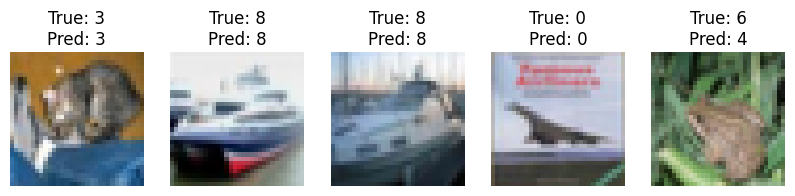

In [ ]:
# Plot first 5 test images with true and predicted labels
plot_images(X_test[:5], y_true_classes[:5], y_pred_classes[:5])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gaussian_noise (GaussianNoise)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 560,672 (2.14 MB)

 Trainable params: 186,890 (730.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 373,782 (1.43 MB)

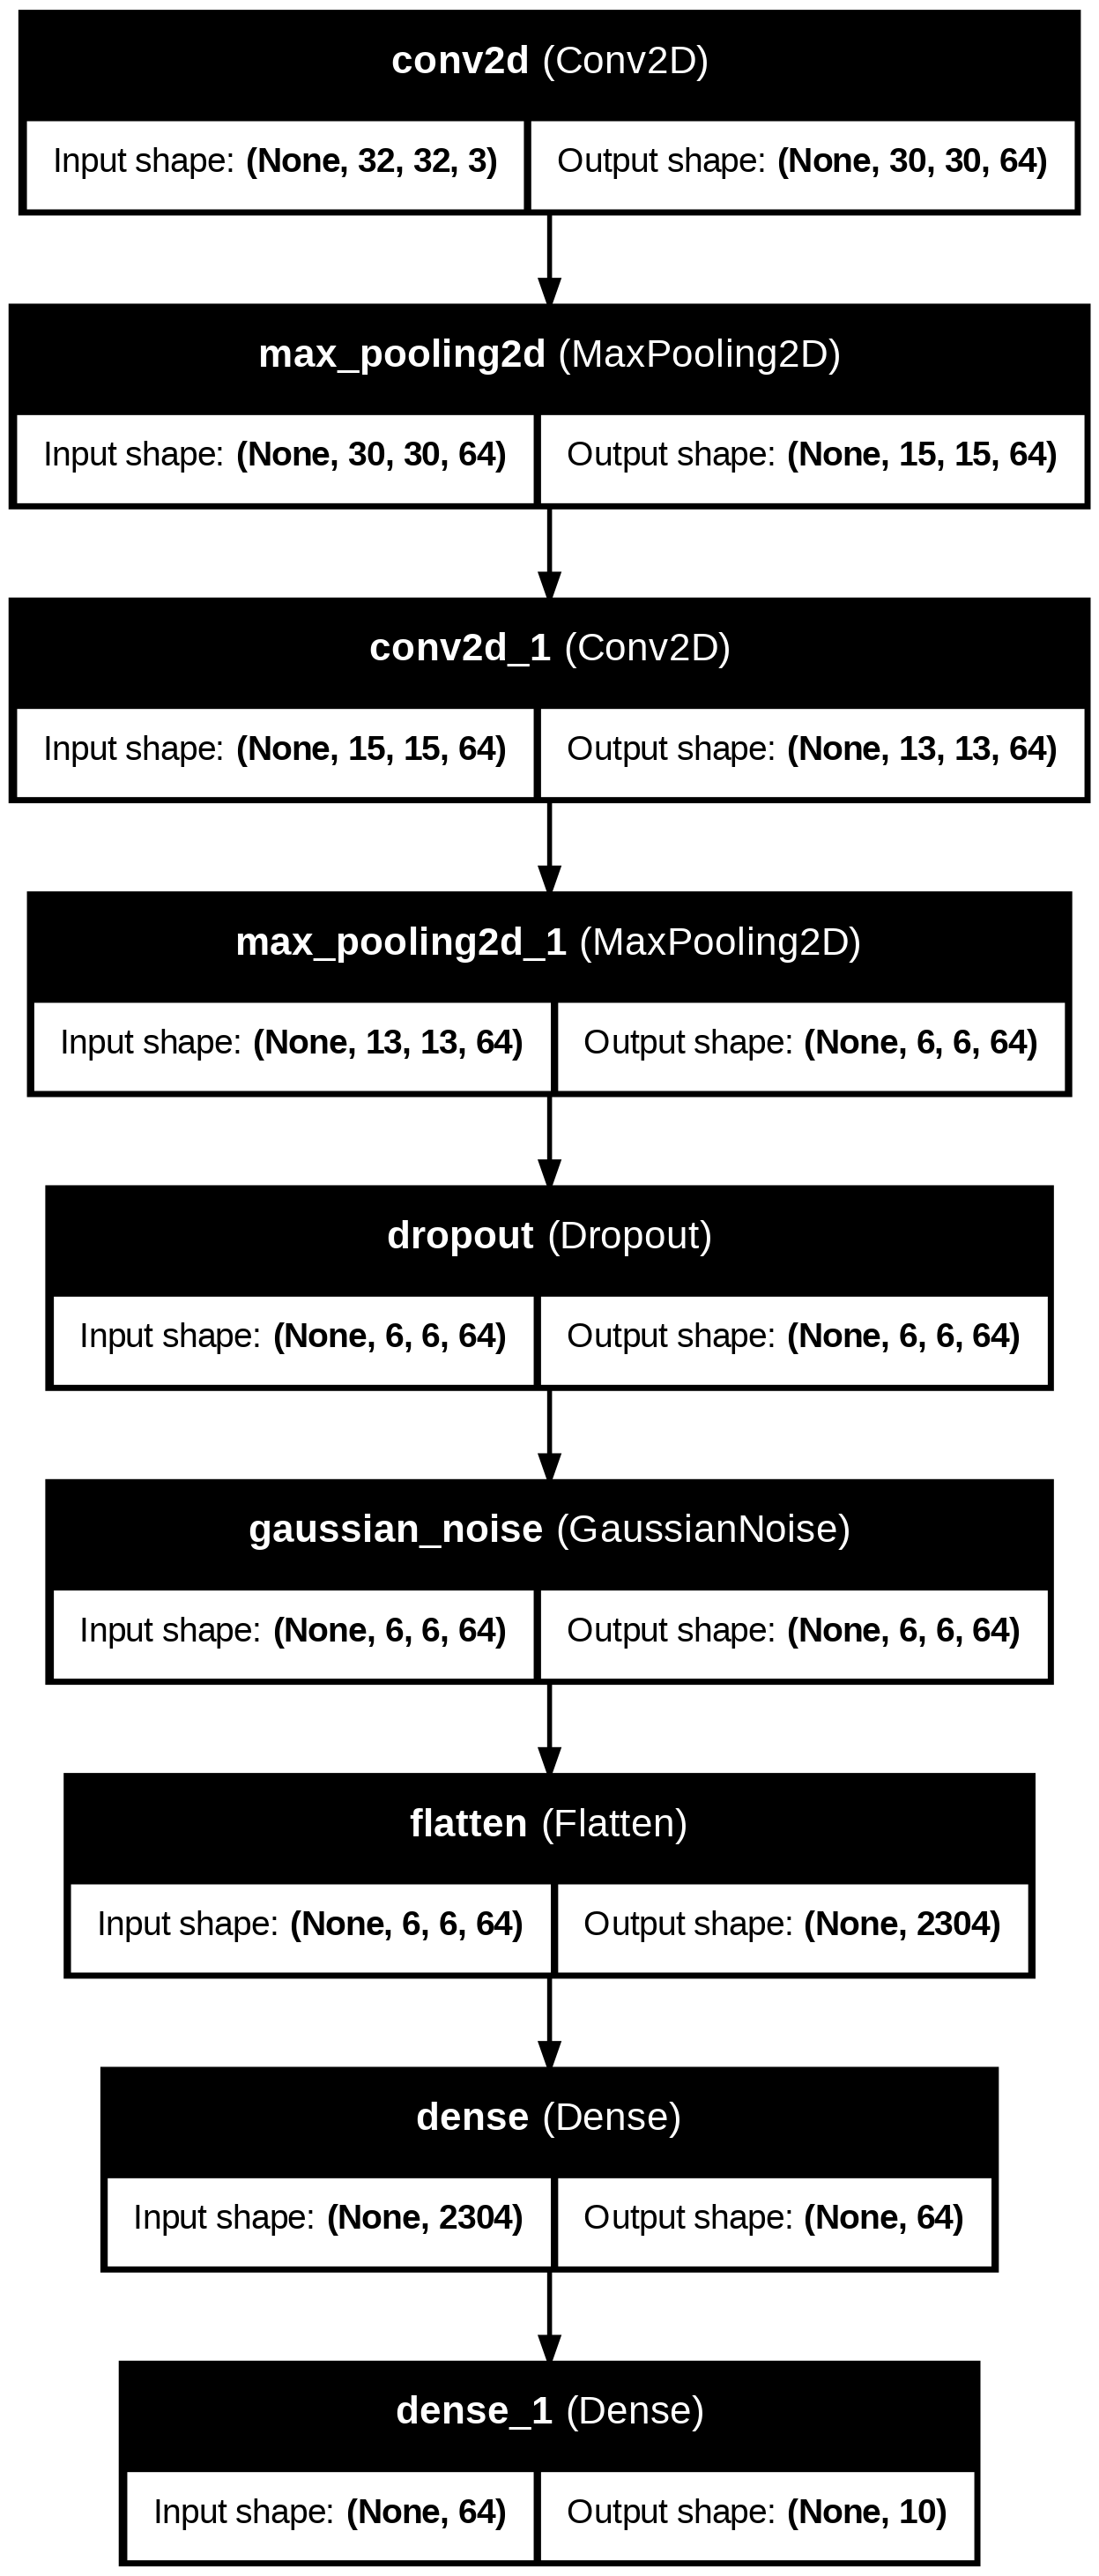

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)